# Assignment 1 (5 Marks)

### Name: Ryan Kim
### Student ID: 200390560

Our dataset contains weekly retail prices of three grades of gasoline, diesel, auto propane and compressed natural gas in 10 Ontario markets. It is downloaded from https://data.ontario.ca/dataset/fuels-price-survey-information. Please plot the following visualizations. Your visualization should be complete.

You can feel free to use the plotting packages in python. Please submit the ipynb file only.



In [6]:
import pandas as pd
df = pd.read_csv('data/fueltypesall1991-2023.csv')

## Question 1

Compare the mean Regular Unleaded Gasoline price among different cities in 2022. Plot the corresponding bar chart.

C:\Users\RjKim\AppData\Local\Temp\ipykernel_9400\3771544990.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Date"] = pd.to_datetime(df["Date"])


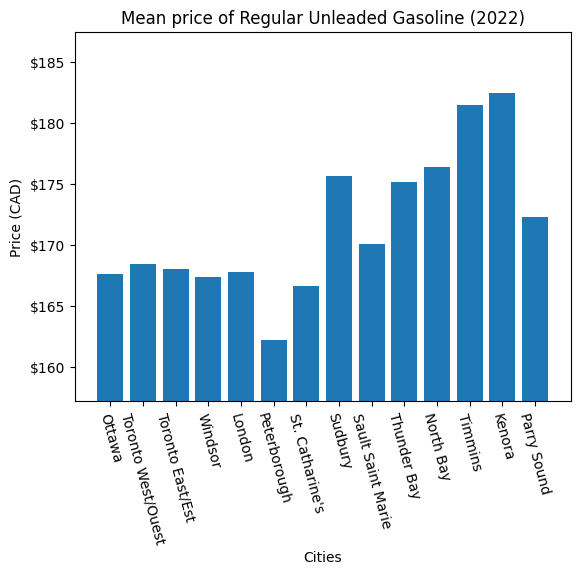

In [54]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import datetime as dt

# Filter for only Regular Unleaded Gasoline
filtered = df[df["Fuel Type"] == "Regular Unleaded Gasoline"]

# Filter for entries of 2022
filtered["Date"] = pd.to_datetime(df["Date"])
filtered = filtered[filtered["Date"].dt.year == 2022]

# Calculate mean values of include dataframe
mean_values = filtered.mean(numeric_only=True)[:-3]

# Ignore non-city columns (as stated in quetion)
cities = df.columns.to_list()[1:-5]

# Define lower and upper ranges for better readibility
lower_range = mean_values.min() - 5
upper_range = mean_values.max() + 5                                                                                      

plt.title("Mean price of Regular Unleaded Gasoline (2022)")
plt.xlabel("Cities") 
plt.ylabel("Price (CAD)")

# Add dollar sign on y-axis
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('$%d'))

# For increased readability zoom in
plt.ylim(lower_range, upper_range)

# Angle City names to for readability
plt.xticks(rotation=-75)

plt.bar(cities, mean_values)
plt.show()

## Question 2

Plot the histogram of the Regular Unleaded Gasoline price in Ottawa for 2022. Choose the appropriate parameters.

C:\Users\RjKim\AppData\Local\Temp\ipykernel_9400\208966232.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Date"] = pd.to_datetime(df["Date"])


(array([4., 9., 8., 5., 6., 9., 3., 1., 4., 3.]),
 array([134.  , 142.02, 150.04, 158.06, 166.08, 174.1 , 182.12, 190.14,
        198.16, 206.18, 214.2 ]),
 <BarContainer object of 10 artists>)

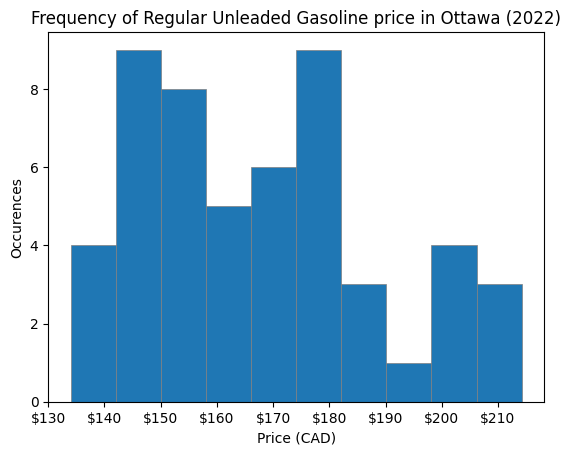

In [55]:
# Filter for only Regular Unleaded Gasoline
filtered = df[df["Fuel Type"] == "Regular Unleaded Gasoline"]

# Filter for entries of 2022
filtered["Date"] = pd.to_datetime(df["Date"])
filtered = filtered[filtered["Date"].dt.year == 2022]

# Filter for only Ottawa's data
filtered = filtered.filter(items=["Date", "Ottawa"])

prices = filtered["Ottawa"].to_list()
dates = filtered["Date"].to_list()

# Labels and Title
plt.title("Frequency of Regular Unleaded Gasoline price in Ottawa (2022)")
plt.ylabel("Occurences")
plt.xlabel("Price (CAD)")

# Add dollar sign to x-axis
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('$%d'))

# Number of bins for histogram is the number_of_price_points//4
plt.hist(prices, len(prices)//5, edgecolor="grey", linewidth=.5)

## Question 3

Plot the ECDF (normalized) of the Regular Unleaded Gasoline price in Ottawa for 2022.

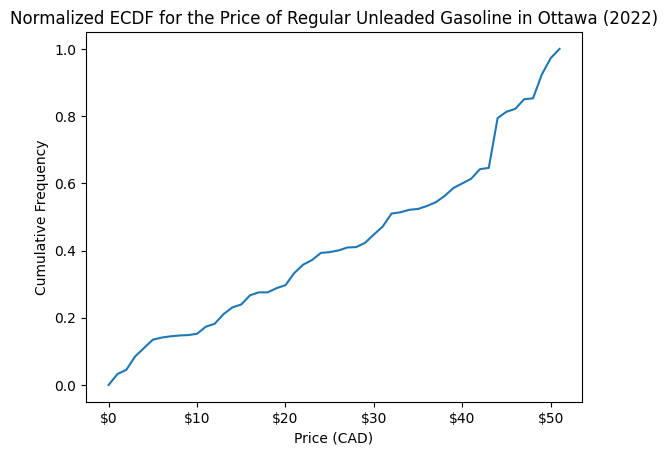

In [64]:
# Filter for entries of 2022 in to Ottawa
filtered["Date"] = pd.to_datetime(df["Date"])
filtered = filtered[filtered["Date"].dt.year == 2022]
raw_prices = filtered.filter(items=["Ottawa"])["Ottawa"]

# Normalize the prices
normalized_prices = (raw_prices - raw_prices.min()) / (raw_prices.max() - raw_prices.min())

# Converted to list and sort prices
normalized_prices_list = normalized_prices.to_list()
normalized_prices_list.sort()

# Add Labels and Title
plt.title("Normalized ECDF for the Price of Regular Unleaded Gasoline in Ottawa (2022)")
plt.ylabel("Cumulative Frequency") 
plt.xlabel("Price (CAD)")

# Set x-axis label units
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('$%d'))

plt.plot(normalized_prices_list)

